# The Zen of Python

* Beautiful is better than ugly.
* Explicit is better than implicit.
* Simple is better than complex.
* Complex is better than complicated.
* Flat is better than nested.
* Sparse is better than dense.
* Readability counts.
* Special cases aren't special enough to break the rules.
* Although practicality beats purity.
* Errors should never pass silently.
* Unless explicitly silenced.
* In the face of ambiguity, refuse the temptation to guess.
* There should be one-- and preferably only one --obvious way to do it.
* Although that way may not be obvious at first unless you're Dutch.
* Now is better than never.
* Although never is often better than *right* now.
* If the implementation is hard to explain, it's a bad idea.
* If the implementation is easy to explain, it may be a good idea.
* Namespaces are one honking great idea -- let's do more of those!

(from https://peps.python.org/pep-0020/)

# Quick Recap: Data Structures

In [ ]:
# Lists, tuples, dictionaries



# Quick Recap: Looping

In [ ]:
# The Pythonic way (enumerate, zip)



## Quick Recap: Classes and Functions

In [1]:
def add_data(data, name, age):
    # Some validators
    assert isinstance(age, (int, float)) and age > 0
    assert isinstance(name, str)

    # Add new data to list
    data.append({'name': name, 'age': age})
    return data

# Initialize a list of dictionaries
people = [{'name': 'John', 'age': 20}, {'name': 'Jane', 'age': 22}]





# Exercise: Infectious Disease Modeling

<p>In this exercise, you will explore and implement a popular epidemiological model of infectuous disease outbreaks.</p>

<p>In particular, we will look at the SEIR model, which is an instance of the compartmental model family:</p>

![SEIR](https://docs.idmod.org/projects/emod-hiv/en/latest/_images/SEIR-SEIRS.png)

<p>Compartmental models partition a population into discrete subgroups. In the case of the SEIR model, the groups are:</p>
<br>
1. S - Susceptible: People who can become infected<br>
2. E - Exposed: People who have been exposed to the virus<br>
3. I - Infected: People who have been infected by the virus<br>
4. R - Recovered: People who have recovered from the virus <br>

Needless to say, there are numerous extentions of this basic model, but it is useful for simulations and (even policy making!). The discrete-time SEIR model is given by the following set of difference equations:
$$\begin{align}
S_t &= S_{t-1} -(\beta S_{t-1} I_{t-1})/N \\
E_t &= E_{t-1} + (\beta S_{t-1} I_{t-1})/N - \sigma E_{t-1} \\
I_t &= I_{t-1} + \sigma E_{t-1} - \gamma I_{t-1} \\
R_t &= R_{t-1} + \gamma I_{t-1}
\end{align}$$

which govern the interactions between the compartments. In the continuous case, the model would be specified by a set of ordinary differential equations (ODEs). The dynamics of the process model are controled by three parameters:

1. $\beta$ - the average contact rate in the population
2. $\sigma$ - the inverse of the incubation period (1 / days_incubation)
3. $\gamma$ - the inverse of the mean infectuous period (1 / days_infectuous)

Thus, we can compute the basic reproduction number $R_0$ as
$$ R_0 = \frac{\beta}{\gamma}$$

The goal of this exercise is to implement the discrete-time SEIR model as a function which takes an input the initial conditions and a vector of parameters and returns the four timeseries of S, E, I, and R people.
Once your code works, create a separate module and commit it to a repository.

In [2]:
import matplotlib.pyplot as plt
from numba import njit


def plot_results(infected):
    """Plots the time series of infected cases."""
    
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))
    ax.plot(infected, color='#AA0000', linestyle='dashed', marker='o')
    ax.set_xlabel('Day', fontsize=16)
    ax.set_ylabel('Number of Infected Cases', fontsize=16)
    ax.set_title('Simulated Oubreak', fontsize=20)
    ax.grid(alpha=0.2)
    return fig

In [6]:
@njit
def simulate_seir(parameters, init_conditions, days=51):
    """TODO"""

    ### Your code here
    beta, sigma, gamma = parameters

    s_t = [init_conditions[0]]
    e_t = [init_conditions[1]]
    i_t = [init_conditions[2]]
    r_t = [init_conditions[3]]

    n = s_t[0] + e_t[0] + i_t[0] + r_t[0]

    for i in range(days):
        s_t.append(s_t[i] - (beta * s_t[i] * i_t[i])/n)
        e_t.append(e_t[i] + (beta * s_t[i] * i_t[i])/n - sigma * e_t[i])
        i_t.append(i_t[i] + sigma * e_t[i] - gamma * i_t[i])
        r_t.append(r_t[i] + gamma * i_t[i])

    return s_t, e_t, i_t, r_t
    

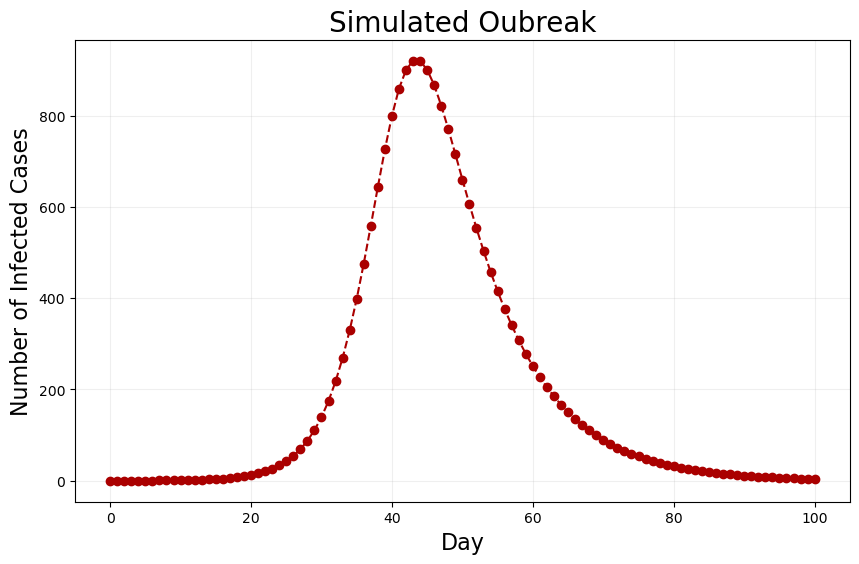

In [9]:
# beta, sigma, gamma
parameters = (3, 0.1, 0.5)

# S0, E0, I0, R0
inits = (9999., 1., 0., 0.)

### Your code here
sim = simulate_seir(parameters, inits, 100)

### Expected result
f = plot_results(sim[2])

In [8]:
%timeit simulate_seir(parameters, inits, 100)

5.81 µs ± 51.4 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
